# Pyfolio Integration on predictive factors

In [1]:
%pylab inline --no-import-all
import yfinance as yf
import alphalens
import pyfolio
import pandas as pd
import numpy as np
import datetime

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pan = yf.download("GOOGL AAPL AMD TSLA NFLX TXN AMAT AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T", start="2011-05-14", end="2021-05-20")
# tech = data[["Open"]]

[*********************100%***********************]  20 of 20 completed


In [4]:
factor = pan['Open']
factor = -factor.pct_change(5)

factor = factor.stack()
factor.index = factor.index.set_names(['date', 'asset'])

In [5]:
pricing = pan['Open'].iloc[1:]

In [6]:
pricing.index = pricing.index.tz_localize('UTC')

In [7]:
factor = factor.unstack()
factor.index = factor.index.tz_localize('UTC')
factor = factor.stack()

In [8]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor,
                                                                   pricing,
                                                                   periods=(1, 3, 5),
                                                                   quantiles=5,
                                                                   bins=None)

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.786163,0.125094,-0.051659,0.052087,10045,20.001991
2,-0.162974,0.152893,-0.016909,0.026754,10043,19.998009
3,-0.118000,0.167118,-0.003399,0.025462,10044,20.000000
4,-0.107436,0.180567,0.009646,0.026491,10044,20.000000
5,-0.071429,0.392377,0.038634,0.042009,10044,20.000000


Returns Analysis


,1D,3D,5D
Ann. alpha,0.023,0.002,-0.008
beta,0.044,0.019,0.023
Mean Period Wise Return Top Quantile (bps),3.554,1.240,0.476
Mean Period Wise Return Bottom Quantile (bps),-1.858,-0.684,-0.103
Mean Period Wise Spread (bps),5.412,1.924,0.596


Information Analysis


,1D,3D,5D
IC Mean,0.013,0.010,0.011
IC Std.,0.294,0.294,0.289
Risk-Adjusted IC,0.043,0.034,0.037
t-stat(IC),2.175,1.728,1.835
p-value(IC),0.030,0.084,0.067
IC Skew,0.081,0.036,0.052
IC Kurtosis,-0.319,-0.296,-0.443


Turnover Analysis


,1D,3D,5D
Quantile 1 Mean Turnover,0.359,0.601,0.773
Quantile 2 Mean Turnover,0.604,0.743,0.793
Quantile 3 Mean Turnover,0.648,0.750,0.780
Quantile 4 Mean Turnover,0.608,0.744,0.801
Quantile 5 Mean Turnover,0.368,0.606,0.774


,1D,3D,5D
Mean Factor Rank Autocorrelation,0.722,0.335,-0.011


<Figure size 432x288 with 0 Axes>

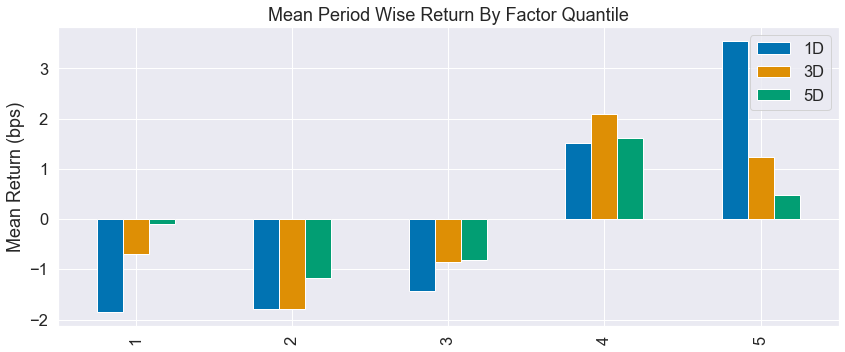

In [9]:
alphalens.tears.create_summary_tear_sheet(factor_data)

In [10]:
pf_returns, pf_positions, pf_benchmark = \
    alphalens.performance.create_pyfolio_input(factor_data,
                                               period='1D',
                                               capital=100000,
                                               long_short=True,
                                               group_neutral=False,
                                               equal_weight=True,
                                               quantiles=[1,5],
                                               groups=None,
                                               benchmark_period='1D')

Start date,2011-05-20
End date,2021-05-12
Total months,173
,Backtest
Annual return,4.108%
Cumulative returns,79.044%
Annual volatility,11.464%
Sharpe ratio,0.41
Calmar ratio,0.13
Stability,0.25
Max drawdown,-31.013%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,31.01,2016-04-21,2018-06-29,2020-10-02,1162
1,15.31,2013-02-21,2013-05-30,2013-12-20,217
2,14.94,2014-11-03,2015-08-04,2016-04-04,371
3,13.35,2011-09-07,2011-10-03,2011-11-09,46
4,9.39,2012-07-19,2012-12-03,2013-01-23,135


Stress Events,mean,min,max
US downgrade/European Debt Crisis,0.33%,-0.83%,3.37%
EZB IR Event,0.16%,-1.28%,1.34%
Apr14,0.22%,-1.39%,1.17%
Oct14,0.25%,-1.27%,3.90%
Fall2015,0.15%,-1.65%,5.34%
Recovery,0.02%,-2.48%,5.02%
New Normal,0.02%,-6.14%,5.85%


Top 10 long positions of all time,max
asset,
AMD,12.50%
HPQ,12.50%
T,12.50%
TSLA,12.50%
AAPL,12.50%
ADBE,12.50%
AMAT,12.50%
AMZN,12.50%
CSCO,12.50%


Top 10 short positions of all time,max
asset,
AMZN,-16.67%
GOOGL,-16.67%
QCOM,-16.67%
AAPL,-12.50%
ADBE,-12.50%
AMAT,-12.50%
AMD,-12.50%
CSCO,-12.50%
HPQ,-12.50%


Top 10 positions of all time,max
asset,
AMZN,16.67%
GOOGL,16.67%
QCOM,16.67%
AMD,12.50%
HPQ,12.50%
T,12.50%
TSLA,12.50%
AAPL,12.50%
ADBE,12.50%


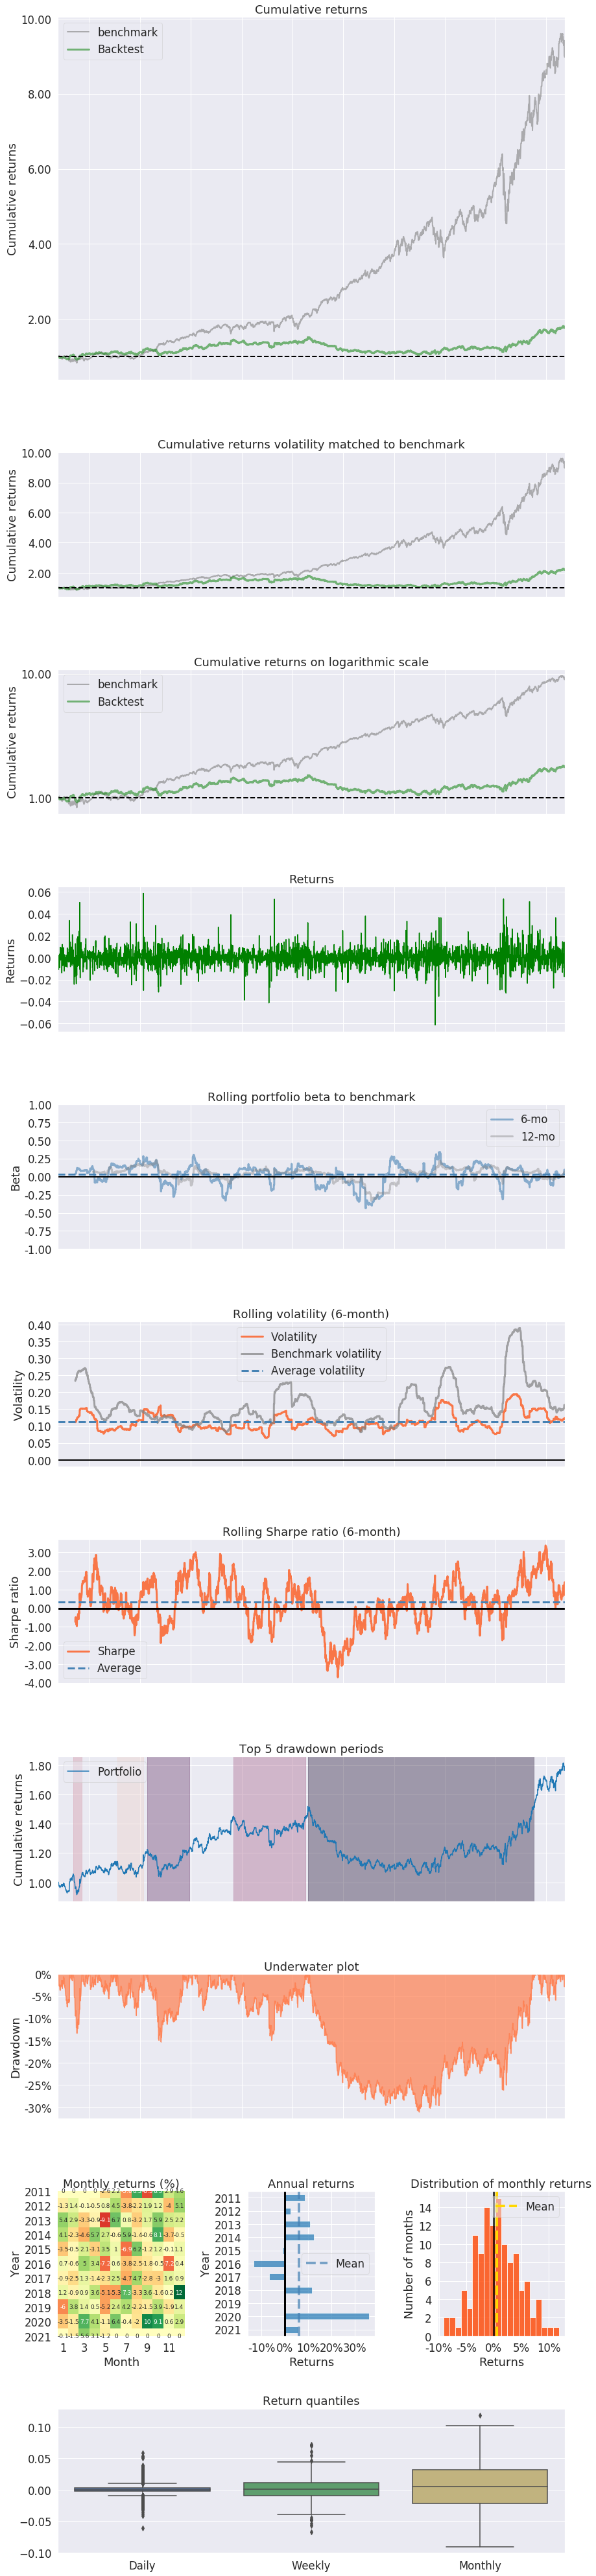

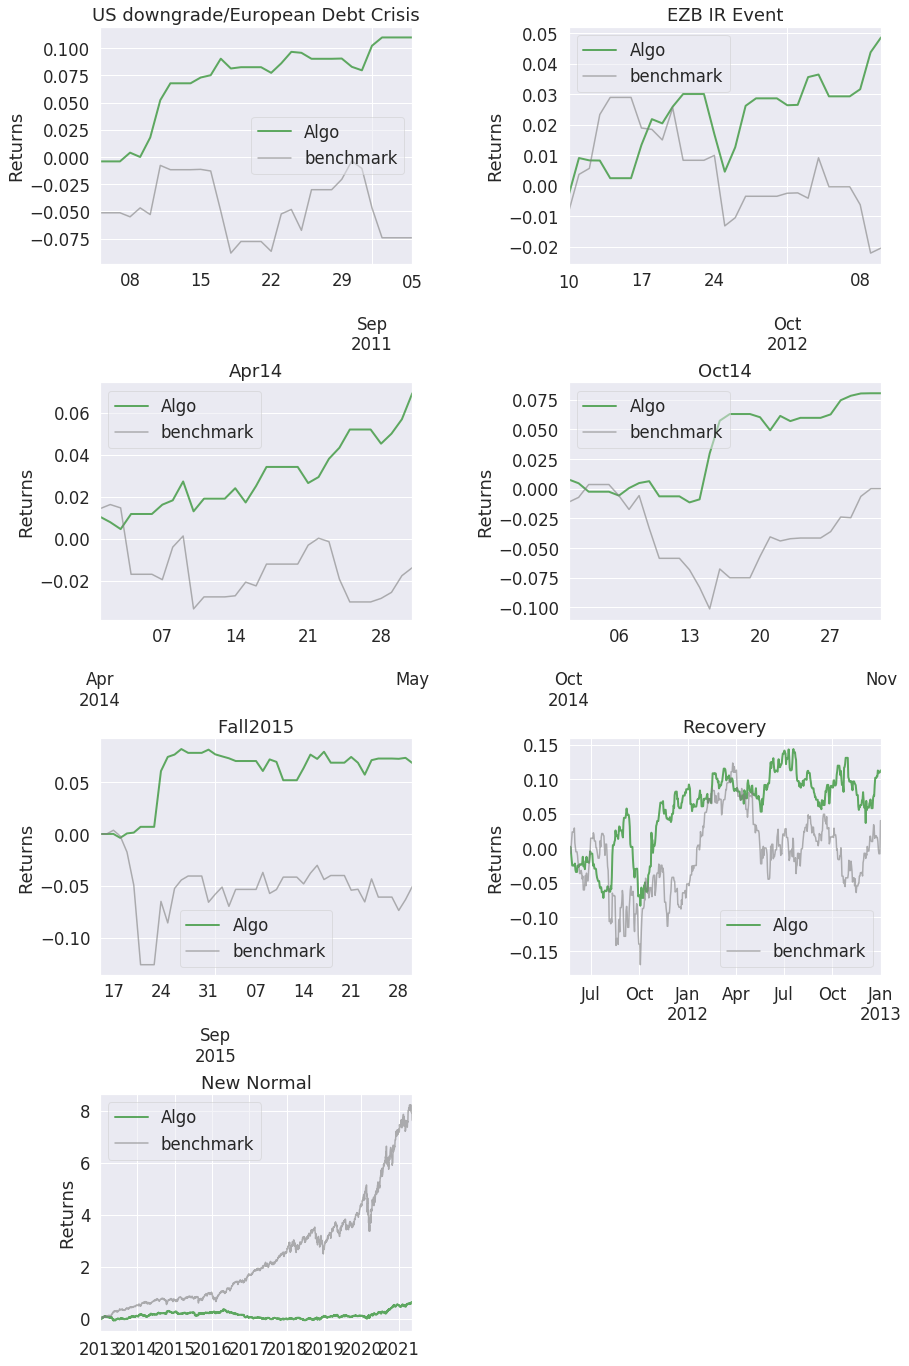

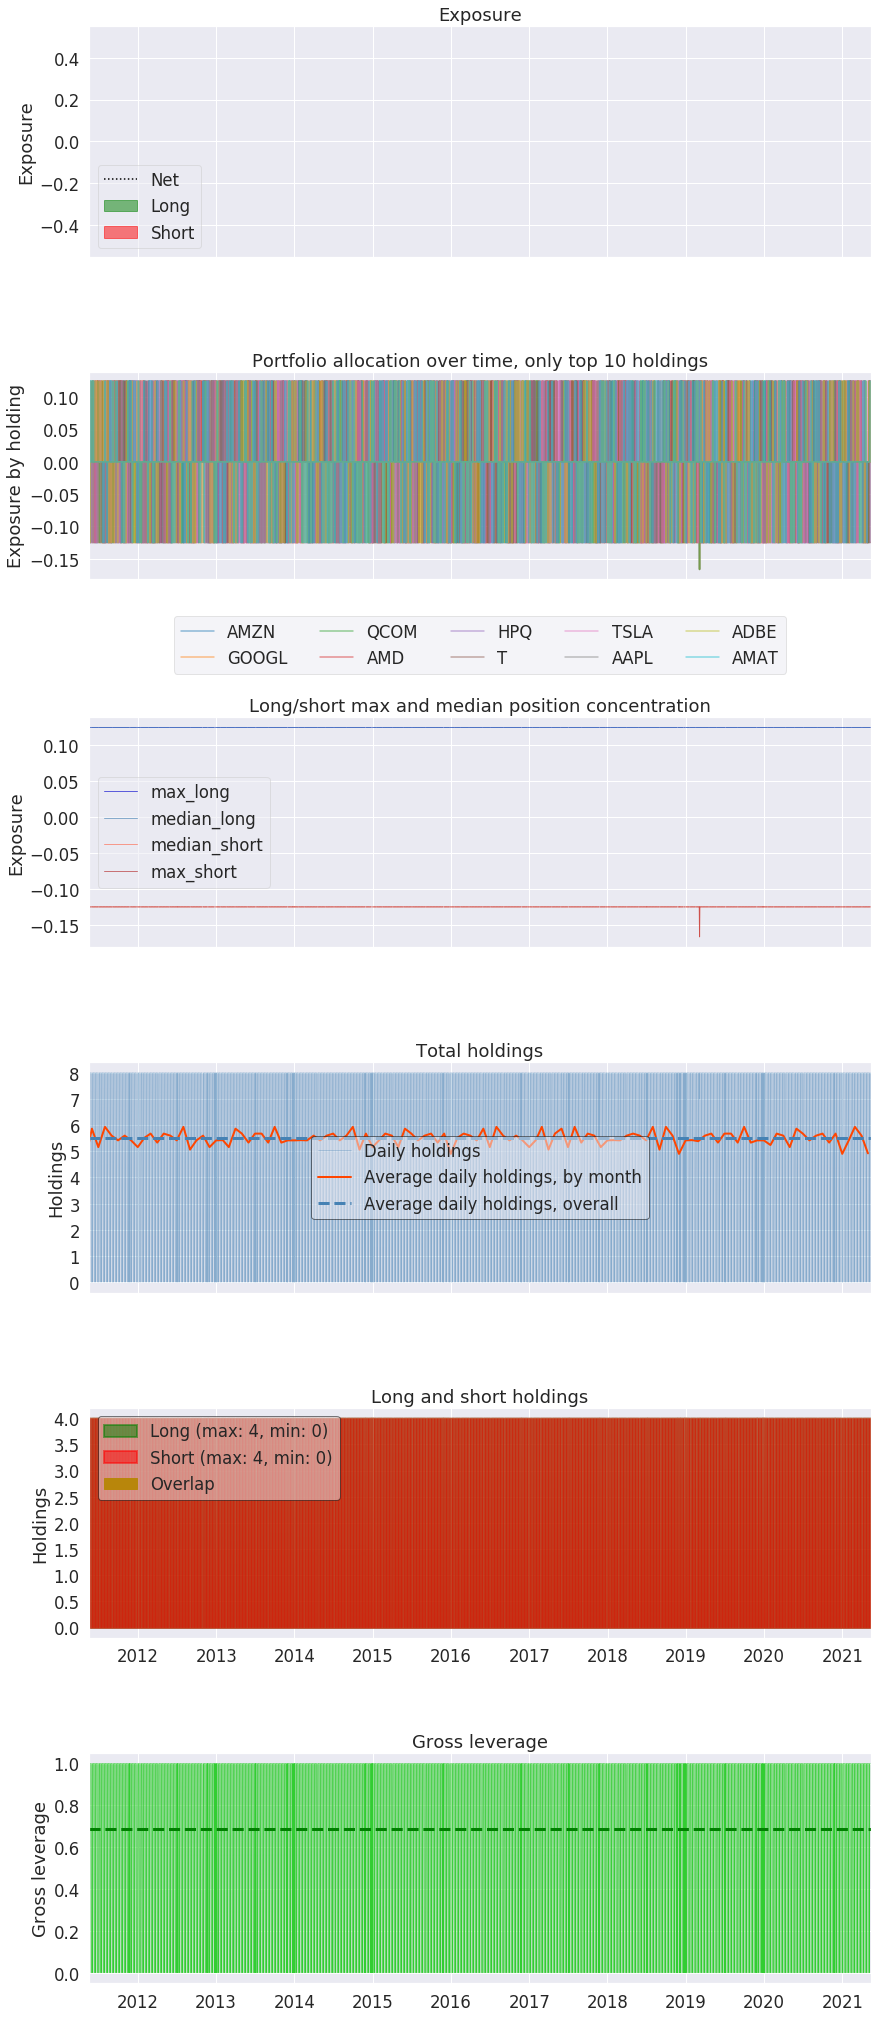

In [11]:
pyfolio.tears.create_full_tear_sheet(pf_returns,
                                     positions=pf_positions,
                                     benchmark_rets=pf_benchmark)